


**kütüphaneleri dahil etme**




In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder


**veri setini dahil etme**

In [6]:
# pd.read_csv("/content/Melbourne_housing_FULL.csv")
# pd.read_csv("/content/Melbourne_housing_FULL.csv")
# veriyi dahil etme
df = pd.read_csv("/content/Melbourne_housing_FULL.csv")
# ham veriye daha sonradan ulaşmak için
df_copy = df.copy()
# veriyi ekrana basma(ilk 5'i)
df_copy.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [8]:
from numpy.core.fromnumeric import shape
# değişken bilgisi öğrenme
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [9]:
#veriler hakkında detaylı bilgi, size,shape, dimension
print(f'shape : {df_copy.shape}\n'
      f'size : {df_copy.size}\n'
      f'dimension: {df_copy.ndim}')
# verinin satır, sütun sayısı, bunlaın çarpımı ve boyutu:

shape : (34857, 21)
size : 731997
dimension: 2


In [10]:
# boş değer kontrolü
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [25]:
# duplicated verileri kontrol etme
df_copy.duplicated().sum()

1

In [14]:
# duplicated veriye erişmek için
df_copy.loc[df_copy.duplicated(keep=False), :]
# bu 2 satır da birebir aynı, veriler şansen mi aynı?

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [17]:
#istatiski verilere erişmek için
df_copy.describe()
# outlierları burada tespit edeceğiz

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [18]:
# veri tiplerini kontrol etmek için
df_copy.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [19]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Missing values için ne yapacağız
- doldurabiliriz
- verimiz yoksa silebiliriz

In [26]:
# duplicated verileri kontrol etme(kaldırmadan önce)
print("Kaldırılmadan önce tekrarlayan veri sayısı:", df_copy.duplicated().sum())



Kaldırılmadan önce tekrarlayan veri sayısı: 1


In [24]:
# Yinelenen verileri kaldır
df.drop_duplicates(inplace=True)
#???????????????????????????
# Kaldırdıktan sonraki hali verileri tekrar görme
print("kaldırma işleminden sonra yineleyen veri sayısı:", df.duplicated().sum())

kaldırma işleminden sonra yineleyen veri sayısı: 0


**--------BURDAN SONRASI ÇALINTI KOD VE ANLAMADIM ZATEN----------**

In [29]:
# from sklearn.preprocessing import LabelEncoder
# bu kütüpten yararlandık^^
#-----------------------------------------
# Kategorik değişken dönüşümü
label_encoder = LabelEncoder()

# Suburb sütunu için Label Encoding
df['Suburb'] = label_encoder.fit_transform(df['Suburb'])

# Address sütunu için Label Encoding
df['Address'] = label_encoder.fit_transform(df['Address'])

# Type sütunu için Label Encoding
df['Type'] = label_encoder.fit_transform(df['Type'])

# Method sütunu için Label Encoding
df['Method'] = label_encoder.fit_transform(df['Method'])

# SellerG sütunu için Label Encoding
df['SellerG'] = label_encoder.fit_transform(df['SellerG'])

# CouncilArea sütunu için Label Encoding
df['CouncilArea'] = label_encoder.fit_transform(df['CouncilArea'])

# Regionname sütunu için Label Encoding
df['Regionname'] = label_encoder.fit_transform(df['Regionname'])

In [30]:
df_copy
#----------------------
# ne değişti anlamadım

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [31]:
# import numpy as np

# Aykırı verileri kontrol etmek için kullanılacak sütunlar
columns_to_check = ['Landsize', 'BuildingArea']

# Aykırı verileri kontrol etme işlemi
for column in columns_to_check:
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    threshold = 3  # Aykırı değerlerin z-puanı bu eşik değerin üzerinde ise kabul edilecektir.

    # Aykırı verileri belirle
    outliers = df[z_scores > threshold]

    # Aykırı verileri ekrana yazdır
    print(f"Aykırı veriler ({column} sütunu):")
    print(outliers)

Aykırı veriler (Landsize sütunu):
       Suburb  Address  Rooms  Type      Price  Method  SellerG        Date  \
1198       23    32953      3     0  2000000.0       7      165  28/08/2016   
3539       88    22529      3     2   950000.0       2      155   4/03/2017   
6195      206     9178      2     2   352500.0       2      370  18/03/2017   
6591      209    24171      2     2   495000.0       2       42  18/03/2017   
7786      260    20980      2     2  1340000.0       7       69   3/12/2016   
7894      260     3938      2     1        NaN       5      198  24/09/2016   
8599      265     6660      3     0   572000.0       2      279  23/04/2016   
9200      288    23623      1     2   315000.0       0      370   3/12/2016   
9215      288    26355      2     2   978500.0       2      370   4/03/2017   
9220      288    28770      2     2        NaN       8       27   4/06/2016   
9271      288    15692      2     2        NaN       0       10  12/11/2016   
9358      288    2

In [32]:
# Aykırı verileri temizlemek için kullanılacak sütunlar
columns_to_clean = ['Landsize', 'BuildingArea']

# Aykırı veri temizleme işlemi
for column in columns_to_clean:
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    threshold = 3  # Aykırı değerlerin z-puanı bu eşik değerin üzerinde ise kabul edilecektir.
    df = df[z_scores <= threshold]

In [33]:
categorical_columns = ['Bathroom', 'Car']  # Eksik değerleri kontrol etmek istediğiniz sütunlar

# Eksik değerleri kontrol etme ve doldurma işlemi
for column in categorical_columns:
    mode_value = df[column].mode().iloc[0]  # Mode (moda) değerini hesapla
    df[column] = df[column].fillna(mode_value)  # Eksik değerleri mode ile doldur

# Eksik değerleri doldurulmuş veriyi gözlemle
print(df)

       Suburb  Address  Rooms  Type      Price  Method  SellerG        Date  \
2           0    15389      2     0  1035000.0       2       33   4/02/2016   
4           0    25128      3     0  1465000.0       5       33   4/03/2017   
6           0    27096      4     0  1600000.0       7      227   4/06/2016   
7           0     8331      4     0        NaN       4      227   6/08/2016   
11          0     5635      3     0  1876000.0       2      227   7/05/2016   
...       ...      ...    ...   ...        ...     ...      ...         ...   
34849     343    20662      3     0   570000.0       5      276  24/02/2018   
34850     343     7747      3     0        NaN       5      173  24/02/2018   
34853     348    16982      2     0   888000.0       5      321  24/02/2018   
34854     348     7350      2     1   705000.0       2      152  24/02/2018   
34856     348    17743      2     0  1020000.0       0      276  24/02/2018   

       Distance  Postcode  ...  Bathroom  Car  Land

In [34]:
df.dropna(axis=0, inplace=True)

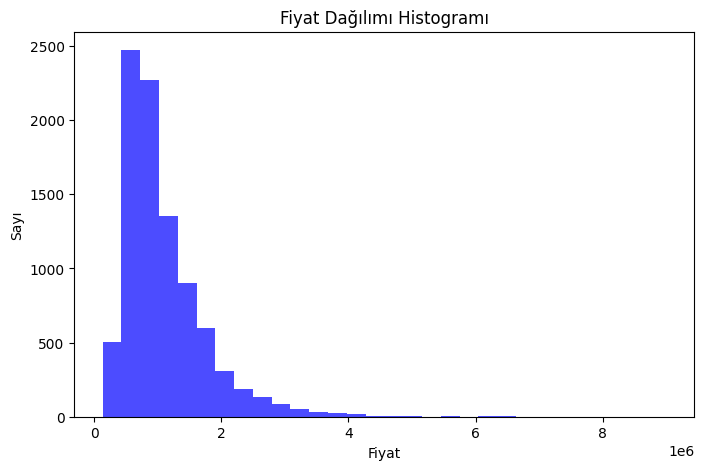

In [35]:
import matplotlib.pyplot as plt

# Fiyat değişkeninin histogramını oluşturma
plt.figure(figsize=(8, 5))
plt.hist(df['Price'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Fiyat')
plt.ylabel('Sayı')
plt.title('Fiyat Dağılımı Histogramı')
plt.show()